In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.1 MB/s 


In [ ]:
!pip install ggplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.2 MB 30.5 MB/s 


In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Line style syntax importation.
%matplotlib inline

# Structuring the code.
import math, datetime, time, random

# Accessing, extracting, manipulating and modifying your observations.
import pandas as pd
import numpy as np

# Visualisations
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import plotly
import plotly.express as px
plt.style.use("seaborn-whitegrid")

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
gender_submission = pd.read_csv("/content/gender_submission.csv")

# Survived Feature (Target variable). 
> 1. Under the hood processes.
> 2. Visualisations.

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.Survived.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
train.Survived.dtypes

dtype('int64')

In [ ]:
train.Survived.isnull().sum()

0

In [ ]:
train.Survived.describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [ ]:
train.groupby("Survived").aggregate("count")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


In [ ]:
train.groupby("Survived").aggregate("min")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
Survived,,,,,,,,,
0,1,1,"Abbing, Mr. Anthony",female,1.00,0,0,110413,0.0
1,2,1,"Abbott, Mrs. Stanton (Rosa Hunt)",female,0.42,0,0,110152,0.0


In [ ]:
train.groupby("Survived").aggregate("max")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
Survived,,,,,,,,,
0,891,3,"van Melkebeke, Mr. Philemon",male,74.0,8,6,WE/P 5735,263.0000
1,890,3,"de Mulder, Mr. Theodore",male,80.0,4,5,WE/P 5735,512.3292


In [ ]:
train.groupby("Survived").aggregate("std")

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,260.640469,0.735805,14.172110,1.288399,0.823166,31.388207
1,252.358840,0.863321,14.950952,0.708688,0.771712,66.596998


In [ ]:
train.groupby("Survived").aggregate("mean")

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [ ]:
train.groupby("Survived").aggregate("median")

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,455.0,3.0,28.0,0.0,0.0,10.5
1,439.5,2.0,28.0,0.0,0.0,26.0


In [ ]:
train.Survived.agg(['count', 'mean', 'std', 'sum', 'max', 'min'])

count    891.000000
mean       0.383838
std        0.486592
sum      342.000000
max        1.000000
min        0.000000
Name: Survived, dtype: float64

In [ ]:
pd.pivot_table(train, index = 'Survived', columns = 'PassengerId', values = 'Ticket' ,aggfunc ='count')

PassengerId,1,2,3,4,5,6,7,8,9,10,...,882,883,884,885,886,887,888,889,890,891
Survived,,,,,,,,,,,,,,,,,,,,,
0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN,1.0
1,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN


In [ ]:
pd.pivot_table(train, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [ ]:
pd.pivot_table(train, index = 'Survived', columns = 'Name', values = 'Ticket' ,aggfunc ='count')

Name,"Abbing, Mr. Anthony","Abbott, Mr. Rossmore Edward","Abbott, Mrs. Stanton (Rosa Hunt)","Abelson, Mr. Samuel","Abelson, Mrs. Samuel (Hannah Wizosky)","Adahl, Mr. Mauritz Nils Martin","Adams, Mr. John","Ahlin, Mrs. Johan (Johanna Persdotter Larsson)","Aks, Mrs. Sam (Leah Rosen)","Albimona, Mr. Nassef Cassem",...,"Yrois, Miss. Henriette (""Mrs Harbeck"")","Zabour, Miss. Hileni","Zabour, Miss. Thamine","Zimmerman, Mr. Leo","de Messemaeker, Mrs. Guillaume Joseph (Emma)","de Mulder, Mr. Theodore","de Pelsmaeker, Mr. Alfons","del Carlo, Mr. Sebastiano","van Billiard, Mr. Austin Blyler","van Melkebeke, Mr. Philemon"
Survived,,,,,,,,,,,,,,,,,,,,,
0,1.0,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,NaN,...,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0
1,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN


In [ ]:
pd.pivot_table(train, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count')

Sex,female,male
Survived,,
0,81,468
1,233,109


In [ ]:
pd.pivot_table(train, index = 'Survived', columns = 'Age', values = 'Ticket' ,aggfunc ='count')

Age,0.42,0.67,0.75,0.83,0.92,1.00,2.00,3.00,4.00,5.00,...,62.00,63.00,64.00,65.00,66.00,70.00,70.50,71.00,74.00,80.00
Survived,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,2.0,7.0,1.0,3.0,NaN,...,2.0,NaN,2.0,3.0,1.0,2.0,1.0,2.0,1.0,NaN
1,1.0,1.0,2.0,2.0,1.0,5.0,3.0,5.0,7.0,4.0,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [ ]:
pd.pivot_table(train, index = 'Survived', columns = 'SibSp', values = 'Ticket' ,aggfunc ='count')

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398.0,97.0,15.0,12.0,15.0,5.0,7.0
1,210.0,112.0,13.0,4.0,3.0,NaN,NaN


In [ ]:
pd.pivot_table(train, index = 'Survived', columns = 'Parch', values = 'Ticket' ,aggfunc ='count')

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445.0,53.0,40.0,2.0,4.0,4.0,1.0
1,233.0,65.0,40.0,3.0,NaN,1.0,NaN


In [ ]:
pd.pivot_table(train, index = 'Survived', columns = 'Ticket', values = 'Ticket' ,aggfunc ='count')

# ValueError: Grouper for 'Ticket' not 1-dimensional

ValueError: ignored

In [ ]:
pd.pivot_table(train, index = 'Survived', columns = 'Fare', values = 'Ticket' ,aggfunc ='count')

Fare,0.0000,4.0125,5.0000,6.2375,6.4375,6.4500,6.4958,6.7500,6.8583,6.9500,...,153.4625,164.8667,211.3375,211.5000,221.7792,227.5250,247.5208,262.3750,263.0000,512.3292
Survived,,,,,,,,,,,,,,,,,,,,,
0,14.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,...,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,2.0,NaN
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,3.0,NaN,NaN,3.0,1.0,2.0,2.0,3.0


In [ ]:
pd.pivot_table(train, index = 'Survived', columns = 'Cabin', values = 'Ticket' ,aggfunc ='count')

Cabin,A10,A14,A16,A19,A20,A23,A24,A26,A31,A32,...,E8,F E69,F G63,F G73,F2,F33,F38,F4,G6,T
Survived,,,,,,,,,,,,,,,,,,,,,
0,1.0,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,1.0,2.0,1.0,NaN,1.0,NaN,2.0,1.0
1,NaN,NaN,1.0,NaN,1.0,1.0,NaN,1.0,1.0,NaN,...,2.0,1.0,NaN,NaN,2.0,3.0,NaN,2.0,2.0,NaN


In [ ]:
pd.pivot_table(train, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count')

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
plt.rcParams.update({'font.size': 15})

Text(0.5, 1.0, 'Evaluations of Survived Passengers Distributions')

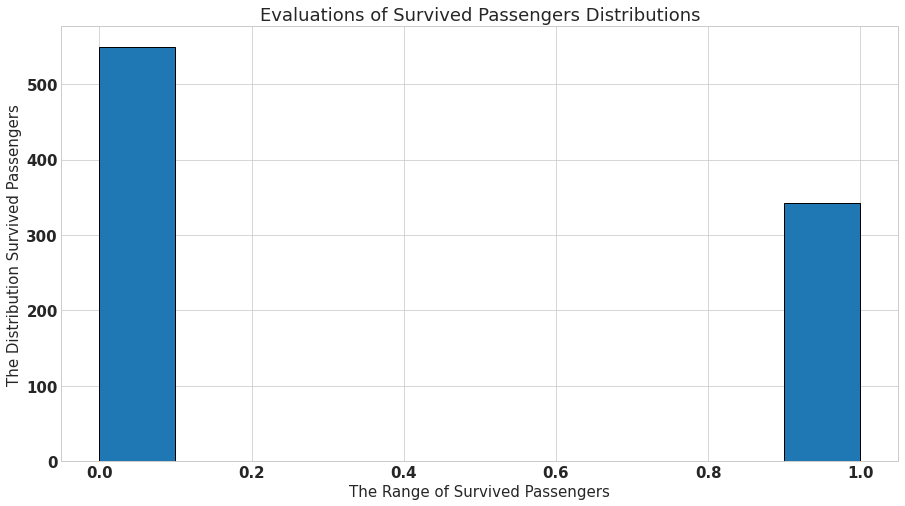

In [ ]:
train.Survived.plot.hist(edgecolor = "black", figsize=(15,8))
plt.xlabel('The Range of Survived Passengers')
plt.ylabel('The Distribution Survived Passengers')
plt.title('Evaluations of Survived Passengers Distributions')

Text(0.5, 1.0, 'Evaluations of Survived Passengers Distributions')

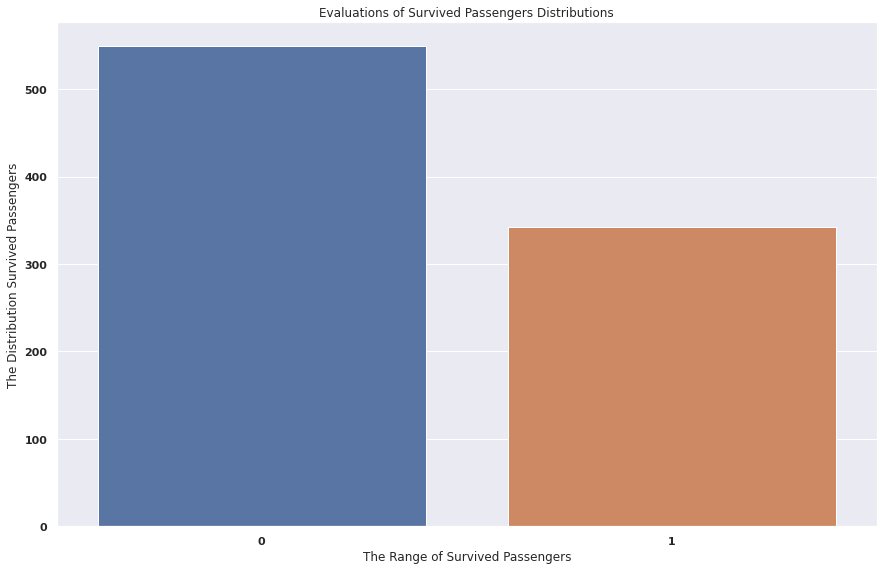

In [ ]:
sns.set(rc={'figure.figsize':(14.7,9.27)})
sns.countplot(x="Survived", data=train)
plt.xlabel('The Range of Survived Passengers')
plt.ylabel('The Distribution Survived Passengers')
plt.title('Evaluations of Survived Passengers Distributions')

Text(0.5, 1.0, 'Evaluations of Survived Passengers Distributions')

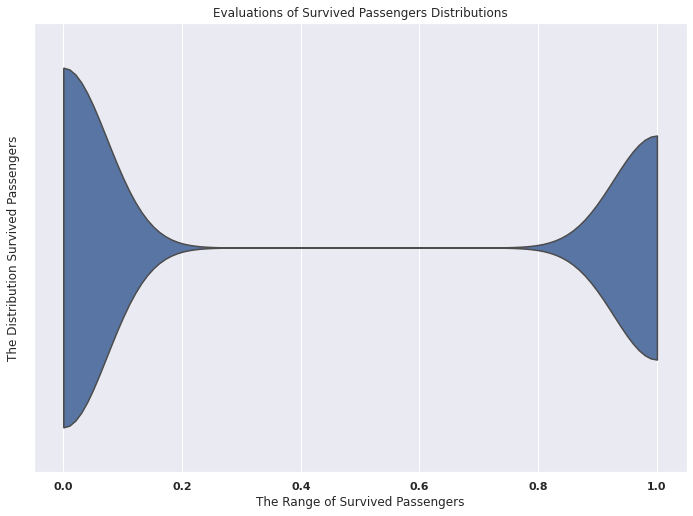

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.violinplot(x="Survived", data=train, cut = 0, bw = .15, inner="stick", scale = "count")
plt.xlabel('The Range of Survived Passengers')
plt.ylabel('The Distribution Survived Passengers')
plt.title('Evaluations of Survived Passengers Distributions')